# 분류 (classification) 문제

여러개의 **종류**(**class** 라고 부릅니다) 중 하나를 구별해 내는 문제를 분류 (**classification**)  라고 부릅니다.  

만약 2개의 클래스중 하나를 고르는 문제를 이진 분류(**binary classification**) 이라고 함



In [1]:
# 기본 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# **Fish Market** 데이터 와 **생선의 분류** 문제


# 데이터 준비
- 예제에서 사용하는 데이터틑 캐글에 공개된 데이터 셋
  - https://www.kaggle.com/datasets/vipullrathod/fish-market  (2024.03 현재)

In [2]:
base_path = r'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'

In [3]:
file_path = os.path.join(base_path, 'fish.csv')
fish_df = pd.read_csv(file_path)
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
# info() 확인, 결측값, dtype 확인
fish_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
""" 컬럼 정보
 Species  생선의 종류 (분류형)
 Weight   생선의 무게 (수치형)
 Length   생선의 길이 (수치형)
 Diagonal 생선의 대각선 길이 (수치형)
 Height   생선의 크기 (수치형)
"""
None

In [5]:
# Species 에는 어떠한 것들이 있나?
fish_df.Species.unique()


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
"""
- Perch '농어'
- Bream '도미'
- Roach '로치, Common Roach 잉어과 담수어'
- Pike '강꼬치고기, Northern pike'
- Smelt '빙어'
- Parkki '청돔'
- Whitefish '송어'
"""
None

In [6]:
# 각 Species 별 데이터의 개수는?
fish_df.Species.value_counts()


,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


## Fish(생선) 분류 (classification) 문제
- 생선의 **길이(length)** 와 **무게 (weight)** 만으로 생선의 **종류(species)** 를 자동으로 분류 가능할까?
- 분류할 생선
  - Bream '도미'
  - Smelt '빙어'

## 도미 와 빙어 데이터 준비

In [9]:
# 도미 35마리의 데이터

# 길이
bream_length = fish_df[fish_df.Species == 'Bream']['Length'].to_list()

# 무게
bream_weight = fish_df[fish_df.Species == 'Bream']['Weight'].to_list()

print(bream_length)
print(bream_weight)


[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


In [10]:
# 빙어 14 마리의 데이터

# 길이
smelt_length = fish_df[fish_df.Species == 'Smelt']['Length'].to_list()

# 무게
smelt_weight = fish_df[fish_df.Species == 'Smelt']['Weight'].to_list()

print(smelt_length)
print(smelt_weight)




[9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


# feature
- 데이터의 특징/특성
- 데이터를 표현하는 성질


In [ ]:
# '길이'와 '무게'  생선 '데이터의 특징'(특성, feature) 이다

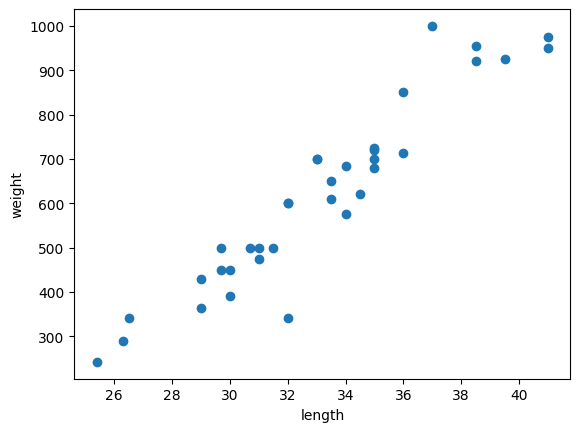

In [11]:
# '도미' 데이터의 길이를 x축으로 무게를 y 축으로 정하여 scatter plot 으로 표시해보자
# 산점도를 통해 두 변수 의 관계를 시각화 해볼수 있다.

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [12]:
# 도미 와 빙어 데이터 수치를 함 눈으로 보자

print(bream_length)
print(bream_weight)
print('-' * 20)
print(smelt_length)
print(smelt_weight)


[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
--------------------
[9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


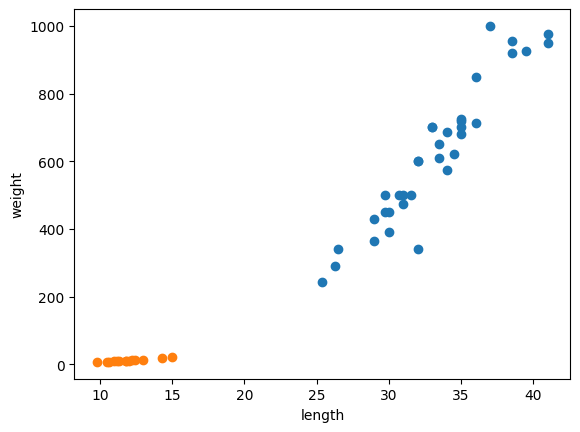

In [13]:
# 두 생선의 데이터를 한번에 보기
# 2개의 산점도를 한 그래프로 그리려면, scatter() 를 연달아 사용하면 된다.

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 머신러닝의 입력(input) 데이터 준비
- feature vector 형태로 준비하기

In [ ]:
# k-최근접 이웃 (k-Nearest Neighbors, KNN) 알고리즘을 사용해 도미와 빙어 데이터를 구분해보자

In [14]:
# 앞서 준비한 도미와 빙어 데이터를 하나의 데이터로 합친다

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
"""
scikit-learn 에선 'data'를
각 '특성들' 의 '배열' 형태로 만들어야 한다 -> 2차원 배열

   길이   무게
[   ↓     ↓
  [25.4, 242.0],
  [26.3, 290.0],
  [26.5, 340.0],
  ...
  [15.0, 19.9]
]

- ★ 이를 '입력(input)' 이라고도 하고 'feature vector' 라고도 함.  이는 scikit-learn 뿐 아니라,
  대부분의 머신러닝 프레임워크에서도 이러한 방식의 input 을 사용한다.
"""
None

In [15]:
# feature vector 형태로 입력데이터 만들기

fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


# 머신러닝의 답안 준비
- 지도학습 (supervised learning) 에선 입력데이터에 대한 **답안** 이 필요하다
- 이를 **label(레이블)** 혹은 **target(타겟)** 이라 한다
- 머신러닝 알고리즘은 이를 계산 가능한 '숫자' 형태로 알려주어야 한다

In [ ]:
# (기본적으로) 머신러닝 알고리즘은 '문자를 이해 못함'
# 이들 데이터도 '숫자' 로 표현하여 알려주어야 함
# 도미는 1 로,  빙어는 0 으로 표현된 '답안'을 준비해보자

# ★ 이러한 답안을 label(레이블), 혹은 'target(타켓)' 이라 합니다
# '이진분류' 문제에서 0값의 클래스를 '음성클래스' 라고 하고,  1값의 클래스를 '양성클래스' 라고도 함.



In [ ]:
"""
머신러닝 실무 쪽에서는

입력 data 를 'x' 로, target 을 'y' 로 표기하는 경우가 많다
특히 입력 data 는 'feature 들의 벡터' 라서 대문자 'X' 로 표기하곤 한다.

"""
None

# ※ 현장강의에서는 'x' 와 'X' 가 혼용되면 헷갈릴수 있으니,
#  대문자 'X'는 가급적 사용안하겠습니다.

In [16]:
# 도미 를 1로 표현하고,  빙어를 0 으로 표현한 target 을 만들기

fish_target = [1] * 35 + [0] * 14
print(fish_target)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 머신러닝의 **모델** 준비

> **모델(model)** 이란 <br> 머신러닝 알고리즘을 구현한 프로그램, <br>
혹은, 프로그램은 아니더라도 알고리즘을 (수식등으로) 구체화 하여 표현한 것.


In [17]:
# k-최근접 이웃 (KNN) 알고리즘 클래스 를 import 함
# (이는 차후에 설명)
from sklearn.neighbors import KNeighborsClassifier


In [18]:
# 모델 클래스 객체 생성
kn = KNeighborsClassifier()

# ※ scikit-learn 에선 지도학습의 모델을 estimator 라고 통칭한다
#   그 중에서 '분류' 모델을 classifier 라고 하며,  변수명을 "clf" 로 작성하는 경우도 많이 본다.

**KNeighborsClassifier**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

```python
class sklearn.neighbors.KNeighborsClassifier(
  n_neighbors=5,
  *,
  weights='uniform',
  algorithm='auto',
  leaf_size=30,
  p=2,
  metric='minkowski',
  metric_params=None,
  n_jobs=None)
```

### KNN(k-최근접 이웃, k-Neareset Neighbors 알고리즘) 이란?

어떤 데이터에 대한 답을 구할때 **'주변의 다른 데이터'**를 보고 '다수를 차지하는 것을 정답'으로 사용함.


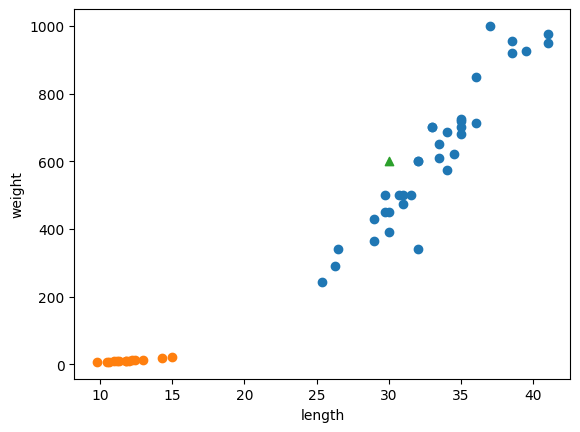

In [19]:
# 가령! 아래에서 legnth:30, weight:600 의 데이터는 과연 '도미' 일까요? '빙어' 일까요?

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

#  과연 도미일까 빙어일까?
plt.scatter(30, 600, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()


# 모델 학습하기
- 이 과정을 **training(훈련)** 혹은 **fitting (적합)** 한다 라고도 함.
- 주어진 모델에, 주어진 데이터를 통해 규칙을 찾아가는 과정
- 모델 알고리즘을 구성하는 각종 파라미터(parameter) 값들이 입력된 데이터를 학습하면서 최적의 값으로 변화되어 간다


In [20]:
# fit(입력데이터, 타겟데이터) : 학습!
# 이 과정을 training(훈련) 이라 함.  혹은 fitting (적합) 한다 라고도 함.
# 주어진 모델에, 주어진 데이터를 통해 규칙을 찾아가는 과정

kn.fit(fish_data, fish_target)


KNeighborsClassifier()

# 학습한 결과 : 정확도 (accuracy)
## score()

In [21]:
# 얼마나 잘 학습했는지 점수 확인!
# score(data, target) => 0.0 ~ 1.0 사이값  1.0 은 100% 맞춘다는 뜻.
# 이를 accuracy(정확도) 라고 함.

kn.score(fish_data, fish_target)


1.0

# 학습된 모델을 통해 예측(predict)하기
## predict()
- 학습한 모델에 새로이 '관측'된 데이터를 넣어 예측 결과 리턴
- 예측에는 target 값 필요 없다
- predict() 의 입력데이터도 'feature 들의 배열'로 넣어주어야 한다
- 리턴값은 '예측값들의 배열'

In [23]:
# 새로이 관측된 데이터(length, weight)를 넣어
# 과연 무엇이라 예측(predict) 하는지 보자

kn.predict([[30, 600]])


array([1])

In [24]:
# 여러 관측값에 대한 예측

kn.predict([
    [30, 600],
    [16, 30],
    ])


array([1, 0])

# KNN 속성 들여다보기

In [ ]:
# KNN 의
# 장점:  데이터만 있으면 된다.
# 단점:  데이터가 너무 많으면 사용하기 힘들다 (많은 메모리, 많은 거리 계산,...)

In [ ]:
# KNeighborsClassifier 의 속성중
#   _fit_X : 전달한 data 들을 가지고 있다
#   _y : 전달한 target 값들을 가지고 있다.

In [25]:
print(kn._fit_X)


[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [26]:
print(kn._y)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
"""
실제로 KNN 알고리즘은 딱히 무엇가 훈련(train) 되는게 없는 셈이다.
fit() 에 전달한 데이터를 저장하고 있다가 새로운 데이터가 등장하면 가장 '가까운 데이터들'을 참고하여
어떤 생선인지만 구분하는 겁니다.

그러면 '가까운 몇개의 데이터'를 참고할게 될까?
이는 n_neighbors= 값으로 정해줄수 있다.  (기본값 5)
"""
None

In [27]:
# 49개의 참조 데이터를 사용하는 모델
kn49 = KNeighborsClassifier(n_neighbors=49)

In [28]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)


0.7142857142857143

In [29]:
print(35 / 49)


0.7142857142857143


In [ ]:
"""
KNeighborsClassifier 의 매개변수들
- n_neighbors: 이웃의 개수
- p : 매개변수 거리 재는 방법.
       1 - 맨해튼 거리
       2 - 유클리디안 거리 (디폴트)

- n_jobs: 사용할 CPU 코어 지정.   이웃간의 거리 계산속도를 높일수는 있지만 fit() 메소드에는 영향이 없다
      1 - 기본값
     -1 - 모든 CPU 코어 사용
"""
None

### 도전


In [ ]:
# 과연 n_neighbors= 가 몇개일때부터 정확도(accuracy)   가 100% 에 미치지 못할까?
# 함 확인해보자

# 결과 예시]
#   18 0.9795918367346939  <=  n_neighbors 와 정확도 출력

In [30]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)
  if score < 1:
    print(n, score)
    break


18 0.9795918367346939


---
# 훈련 세트 와 테스트 세트

주어진 '문제'와 '답안지' 로 열심히 공부해서 문제집 문제집 100점 맞으면 그 학생은 잘한다 할수 있나?

진짜 잘하는지는 '문제집에 없던 문제'들을 풀어도 점수가 좋아야 한다.

그래서 data 와 target을 학습(training) 하는데 다 집어 넣는 것이 아니라, 훈련세트와 테스트세트를 나누어서 모델 훈련 및 검증에 사용한다

- 훈련 (training) 세트 : 모델 훈련 용 데이터 셋
- 테스트 (test) 세트 : 모델 평가(검증) 용 데이터 셋

![](https://pozalabs.github.io/assets/images/Dataset_Splitting/data_split.jpg)

## 샘플링 편향 문제

In [ ]:
# 현재  도미(1) 와 빙어(0) 가 각각 35, 14 마리 있다.

In [31]:
# 일부 생선 데이터를 추출한걸 'sample(샘플)' 이라고 부른다
print(fish_data[4])


[29.0, 430.0]


In [32]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [33]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
"""

데이터의 처음 35개를 train 세트 (훈련세트),  나머지 14개를 test 세트 (테스트 세트)로 사용해보도록 해보자

[
  [25.4, 242.0], ─┐
  [26.3, 290.0],  │ train 세트 35개
  [26.5, 340.0],  │
  ...            ─┘
  ...            ─┐
  ...             │ test 세트 14개
  [15.0, 19.9]   ─┘
]

"""
None

In [34]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]


In [35]:
kn.fit(train_input, train_target)  # 훈련용 데이터로 학습
kn.score(test_input, test_target)  # 테스트용 데이터로 평가

0.0

In [ ]:
# ↑ 샘플링 편향 (sampling bias) 문제!
# train 세트에는 도미 가득!
# test 세트에는 빙어 가득!

# 해결 -> 골고루 섞어야 한다

## 데이터 shuffle

In [ ]:
# 여기선 numpy 를 사용하여 섞어 보겠다.
# 나중에 scikit-learn 에서 사용하는 방법도 소개할 예정

In [36]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)


In [37]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [38]:
input_arr.shape

(49, 2)

In [39]:
# random index 생성
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [40]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [41]:
input_arr[[1, 3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [47]:
# train 세트
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [43]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [44]:
# test 세트
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


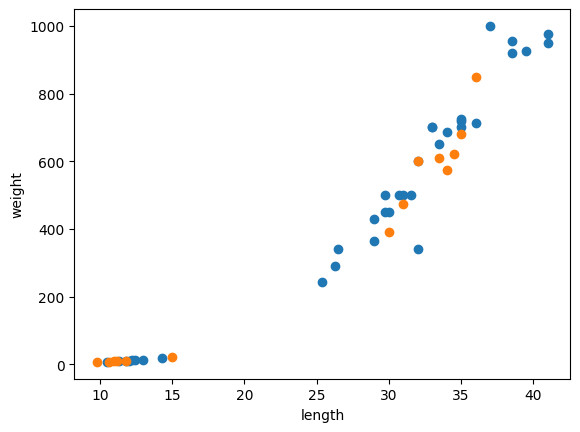

In [45]:
# train 세트와  test 세트가 적절히 잘 섞였는지 시각화 확인

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [48]:
# 훈련은 train 세트로!
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)


KNeighborsClassifier()

In [49]:
# 평가는 test 세트로!
kn.score(test_input, test_target)

1.0

In [50]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [51]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

---
# 데이터 전처리

In [ ]:
# 과연 지금까지의 모델 .. 괜찮은걸까?

In [52]:
# 길이 25cm  무게 150g .  과연 뭐라고 예측할까?

kn.predict([[25, 150]])

# ↓ 0? 빙어라고?

array([0])

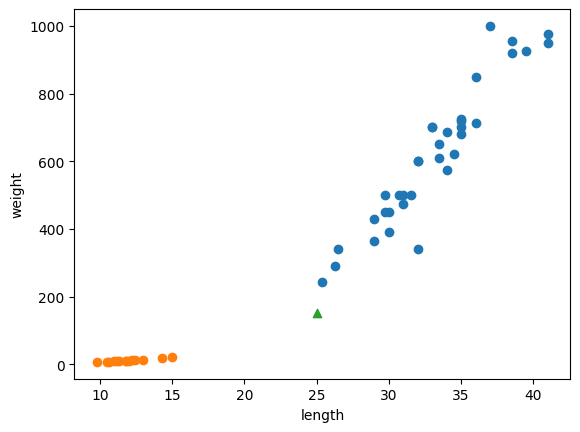

In [53]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.scatter(25, 150, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [54]:
# 이런 일이 왜 일어나는지 살피기 위해 몇가지 학습하고 진행하자

# numpy 의 column_stack() 함수
#   전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결.

np.column_stack(([1, 2, 3], [4, 5, 6]))


array([[1, 4],
       [2, 5],
       [3, 6]])

In [56]:
# 도미 35, 빙어 14마리 feature 들을 다 합쳐놓고
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight


In [57]:
# fish_length 와 fish_weight 를 합쳐보자.  (위에서 zip() 으로 만든것과 동일 결과)

fish_data = np.column_stack((fish_length, fish_weight))

In [58]:
# 처음 5개만 살펴보자
fish_data[:5]


array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [59]:
# 동일 방법으로 target 데이터도 만들어보자
# np.ones 와 np.zeros() 사용

print(np.ones(5))


[1. 1. 1. 1. 1.]


In [60]:
# 도미 35, 빙어 14 마리 데이터  (직전에 [1] * 35 + [0] * 14 와 동일 결과)

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

fish_target


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 훈련 세트와 테스트 세트 나누기 train_test_split

In [61]:
from sklearn.model_selection import train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
```python
sklearn.model_selection.train_test_split(
  *arrays,
  test_size=None, train_size=None, random_state=None, shuffle=True,
  stratify=None)
```


In [62]:
train_input, test_input, train_target, test_target = \
  train_test_split(fish_data, fish_target, random_state=42)

# 주어진 data 와 target 을 무작위로 섞은뒤 train:test 를 3:1 로 분리  (디폴트)
# 학습 예제시 동일 결과를 내기 위해 ransom_state 값을 줌

In [63]:
print(train_input.shape, test_input.shape)


(36, 2) (13, 2)


In [64]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [65]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
"""
잘 섞였나?
도미: 빙어 = 35:14  => 대략 2.5:1

그러나 위 결과는 3.3:1 (샘플링 편향문제 여전히..)
"""
None

In [66]:
# stratify= 매개변수에 target 을 전달하면 클래스 비율에 맞게 데이터를 나눈다.
# train 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용.

train_input, test_input, train_target, test_target = \
  train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)


In [67]:
print(test_target)


[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

In [68]:
# 학습 시켜보자

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [69]:
kn.predict([[25, 150]])  # 여전히 빙어(0) 라고?

array([0.])

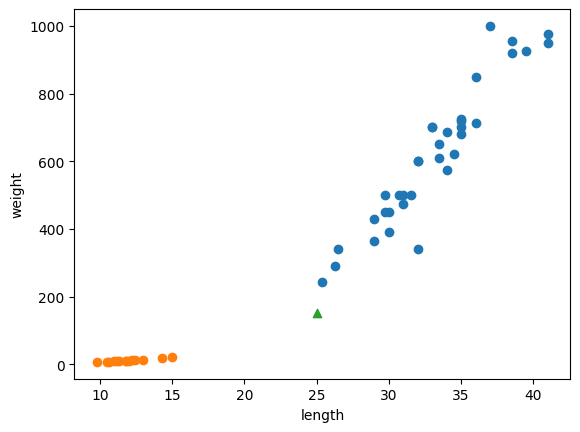

In [70]:
# 다시 시각화로 확인해보기

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
"""
분명히 (25, 150) 은 빙어(0) 보다 도미(1) 에 가까이 있다.
그런데 왜 모델은 멀리 떨어진 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 판단한걸까?
"""
None

# KNN 은 주변의 샘플 중에서 '다수' 인 클래스를 예측으로 사용합니다.
# 이 샘플(25, 150)의 주변샘플은 어떠한 것들이 있는지 들여다 봅시다.
# kneighbors() 메소드를 통해 할수 있다

In [71]:
distances, indexes = kn.kneighbors([[25, 150]])

# kneighbors() 는 이웃까지의 거리(들)과 이웃 샘플에 대한 인덱스(들)을 리턴함
# 현재 n_neighbors 는 기본값 5 이기 때문에 5개의 neighbor 들이 리턴된다

In [72]:
distances


array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [73]:
indexes


array([[21, 33, 19, 30,  1]])

In [ ]:
# 과연 위 인덱스들의 데이터가 어떤 데이터들인가? 시각화를 해보자

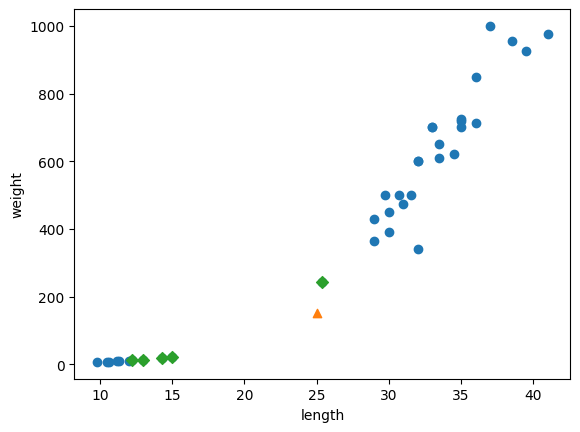

In [74]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')

plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [75]:
# 직접 이웃 들의 데이터 확인
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [76]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [77]:
# distances 배열. <-- 이웃간의 거리가 담겨있다
print(distances)



[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라 (전처리, 스케일링)
preprocessing, scaling

In [ ]:
# x 축의 범위와 y 축의 범위가 다르다!
# x축 (length)의 범위는 (10 ~ 40)
# y축 (weight)의 범위는 (0 ~ 1000) x축보다 더 넓다!


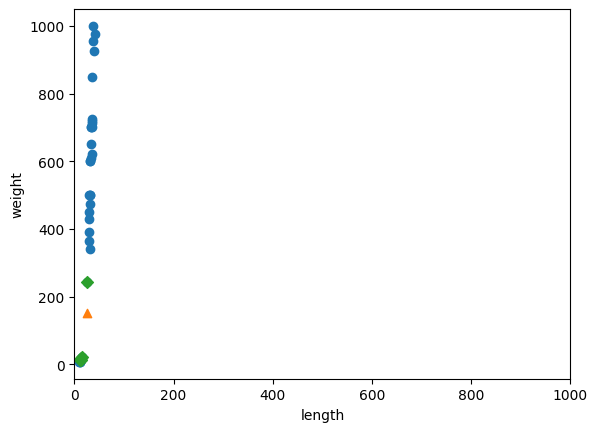

In [78]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
# x 축도 0 ~ 1000 으로 맞추어 보자.
plt.xlim((0, 1000))

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 두 개의  feature(특성), 즉 length 와 weight 의 값이 놓인 범위가 매우 다르다.
# 이를 두 feature 의 'scale(스케일)이 다르다' 라고도 말합니다.

# 따라서!
# feature 들이 머신러닝에서 서로 '동등한 영향력'을 행사하도록 할려면 일정한 기준으로 맞추어야 한다
# 이러한 작업들을 데이터 전처리 (data preprocessing) 이라 하고,
# feature 들을 일정한 기준으로 맞추는 작업을 스케일링(scaling) 한다고 함

# ※ 모든 알고리즘이 '거리 기반'은 아닙니다
#    가령, 트리 기반 알고리즘은 feature 의 스케일이 다르더라도 잘 동작함.

In [ ]:
# 스케일링의 대표적인 방법 2가지
# - 표준화 (standardazation)
# - 정규화 (normalization)

# 이번예제에선
# 표준점수 (standard score) 를 사용하여 표준화를 해봅니다
# 표준점수는 'z 점수'라고도 합니다
# 표준점수는 각 feature 값이 평균에서 표준편차의 몇배만큼 떨어져 있는지를 나타냄.
#         이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능.

# '분산' 은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내는 것
# '표준편차' 는 분산의 제곱근 <- 데이터의 분산된 정도 표현
# '표준점수' 는 각 데이터가 원점에서 몇 표준편차 만큼 떨어져 있는지 나타내는 값

In [79]:
# 계산은 간단하다
# 평균을 빼고 표준편차를 나누어 주면 된다

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [80]:
# 계산된 '평균' 과 '표준편차' 출력
print(mean, std)

# ↓ 각 특성마다 평균과 표준편차가 구해짐.

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [81]:
# 이제 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환함
train_scaled = (train_input - mean) / std


In [82]:
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


## 전처리 데이터로 모델 훈련하기

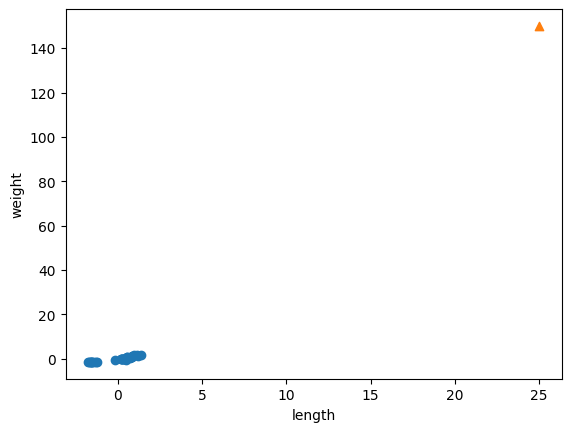

In [83]:
# 앞에서 표준점수로 변환한 train_scaled 를 만들었다.
# 이 데이터와 샘플 (25,150)을 다시 시각화 해보자

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 명심!
# 반드시 train 세트의 mean, std 를 이용해서 '샘플도 변환'해야 한다!

"""
↑ 이상하네요,  예상과 다르다.
오른쪽 맨 꼭대기에 수상한 샘플 하나만 덩그러니 떨어져 있다.

이렇게 된이유는?
train 세트를 mean(평균) 으로 빼고 std(표준편차)로 나누어 주었기 때문에
'값의 범위'가 크게 달라졌습니다.
따라서! 샘플 [25, 150] 을 동일한 비율로 변환하지 않으면 이런 현상이 발생한다

명심!
반드시 train 세트의 mean, std 를 이용해서 '샘플도 변환'해야 한다!

"""

None

In [84]:
# 샘플도 동일하게 스케일링
new = ([25, 150] - mean) / std


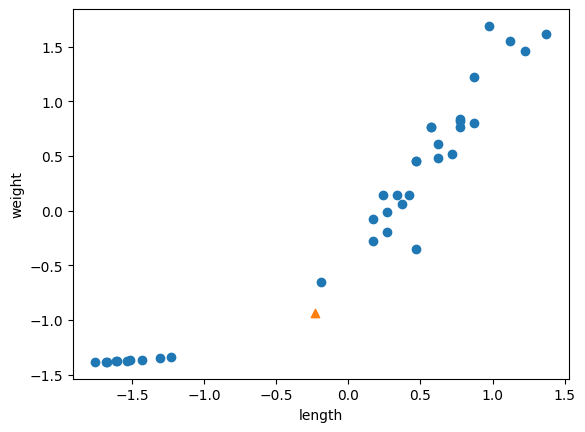

In [85]:
# 다시 확인

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [86]:
# 다시 훈련
kn.fit(train_scaled, train_target)


KNeighborsClassifier()

In [87]:
# test 세트도 train 세트의 평균과 표준변차로 변환
test_scaled = (test_input - mean) / std


In [88]:
# 이제 모델을 평가해보자
kn.score(test_scaled, test_target)


1.0

In [89]:
# 수상한 도미 관측치 예측
kn.predict([new])


array([1.])

In [90]:
# 위 샘플의 이웃들
distances, indexes = kn.kneighbors([new])

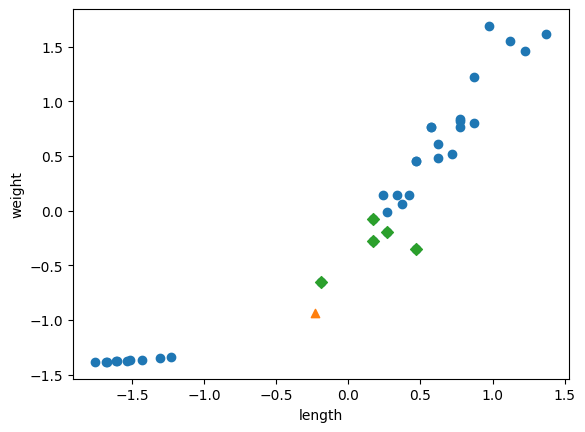

In [91]:
# 시각화 확인
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [92]:
# 기술통계량을 볼때 전처리 여부도 확인해봐야 한다
fish_df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# balanced vs. imbalanced  확인
# outlier 확인
# 전처리 scaling 필요성 여부 확인

# 정리 (일단 여기까지)
1. 데이터 준비
1. 훈련세트 - 테스트세트 나누기 (섞기)
1. 전처리하기 (스케일링)
1. 모델 생성, 학습
1. 결과 평가 (정확도)
1. 예측 해보기

# 모델 저장, 불러오기

In [93]:
import joblib
# 파이썬 객체를 바이너리로 저장 (*.pkl)

In [94]:
savedir = os.path.join(base_path, 'out')
if not os.path.exists(savedir):
  os.makedirs(savedir)
  print('out 디렉토리 생성')
else:
  print('out 디렉토리가 있습니다')

out 디렉토리가 있습니다


In [95]:
savefile = "kn.pkl"
joblib.dump(kn, os.path.join(savedir, savefile))

# *.pkl  (pickle) 파일은 파이썬에서 많이 사용하는 serialized object 를 파일에 저장한 형태.

['/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)/out/kn.pkl']

In [96]:
# 불러오기
kn = None

In [97]:
kn = joblib.load(os.path.join(savedir, savefile))

In [98]:
kn.score(test_scaled, test_target)

1.0

In [99]:
# 새로운 관측데이터 예측
# ★평가하려면 동일한 스케일링 해야 한다.★
new = ([30, 180] - mean) / std
new

array([ 0.27075315, -0.84781355])

In [101]:
print(kn.predict([new]))

[1.]


In [102]:
# 빙어도 예측될까?
new = ([10, 9] - mean) / std
new


array([-1.73276452, -1.37673579])

In [103]:
kn.predict([new])

array([0.])